In [2]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

## 1.2 Implementation
Load the dataset in ‘hw3 p1.pkl’ and run your K-NN algorithm for both distances and for all
K = [1, 2, . . . , 25]. Plot your test accuracy as a function of K.

In [35]:
p1_data = pd.read_pickle("./hw3_p1.pkl")
print(p1_data.keys())

p1_x_train = p1_data["x_train"].copy()
p1_y_train = p1_data["y_train"].copy()
p1_x_test = p1_data["x_test"].copy()
p1_y_test = p1_data["y_test"].copy()

print("Train shape:", p1_x_train.shape, p1_y_train.shape)
print("Test shape:", p1_x_test.shape, p1_y_test.shape)  

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])
Train shape: (500, 2) (500,)
Test shape: (500, 2) (500,)


In [36]:
def euclidean_distance(x,z):
    return np.linalg.norm(x - z, axis=1)**2

In [37]:
def kernel_distance(x, z):
    x_norm_sq = np.sum(x * x, axis=1) 
    z_norm_sq = np.dot(z, z)          
    return (x_norm_sq ** 2) + (z_norm_sq ** 2) - 2 * (x_norm_sq * z_norm_sq)

In [38]:
def knn_predict(x_train, y_train, x_test, k):
    n, d = x_test.shape
    k_pred = np.zeros(n, dtype=int)  
    e_pred = np.zeros(n, dtype=int)  

    for i in range(n):
        e_distances = euclidean_distance(x_train, x_test[i]) 
        k_distances = kernel_distance(x_train, x_test[i])     

        k_indices = np.argsort(k_distances)[-k:]  
        k_labels = y_train[k_indices]
        k_pred[i] = np.bincount(k_labels).argmax()

        e_indices = np.argsort(e_distances)[:k]  
        e_labels = y_train[e_indices]
        e_pred[i] = np.bincount(e_labels).argmax()

    return k_pred, e_pred

In [39]:
k_pred, e_pred = knn_predict(p1_x_train, p1_y_train, p1_x_test, k=25)

k_acc = np.mean(k_pred == p1_y_test)
e_acc = np.mean(e_pred == p1_y_test)

print("K Test Accuracy:", k_acc)
print("E Test Accuracy:", e_acc)

K Test Accuracy: 0.206
E Test Accuracy: 0.822


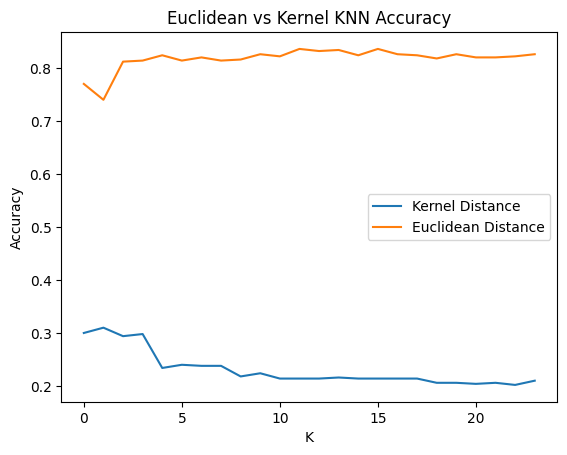

In [40]:
k_accs = []
e_accs = []
for i in range(1,25):
  k_pred, e_pred = knn_predict(p1_x_train, p1_y_train, p1_x_test, k=i)
  k_acc = np.mean(k_pred == p1_y_test)
  e_acc = np.mean(e_pred == p1_y_test)
  k_accs.append(k_acc)
  e_accs.append(e_acc)
plt.plot(k_accs)
plt.plot(e_accs)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Euclidean vs Kernel KNN Accuracy")
plt.legend(["Kernel Distance", "Euclidean Distance"])
plt.show()

## 2.1 Vanilla Regression

In [41]:
p2_data = pd.read_pickle("./hw3_p2.pkl")
print(p2_data.keys())

p2_x_train = p2_data["x_train"].copy()
p2_y_train = p2_data["y_train"].copy()
p2_x_test = p2_data["x_test"].copy()
p2_y_test = p2_data["y_test"].copy()

print("Train shape:", p2_x_train.shape, p2_y_train.shape)
print("Test shape:", p2_x_test.shape, p2_y_test.shape)  

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])
Train shape: (2000, 2) (2000,)
Test shape: (10000, 2) (10000,)


In [42]:
def poly_kernel(u, v, d):
    return (1 + np.dot(u, v)) ** d

def rbf_kernel(u, v, gamma):
    return np.exp(-gamma * np.linalg.norm(u - v) ** 2)

def custom_kernel(u, v, gamma):
    rbf = np.exp(-gamma * np.linalg.norm(u - v) ** 2)
    return -rbf / (1 + rbf)

In [43]:
def kernel_regression_predict(x, x_train, y_train, kernel_fn, **kernel_params):
    num = 0.0
    den = 0.0

    n, _ = x_train.shape
    for i in range(n):
        k = kernel_fn(x, x_train[i], **kernel_params) 
        num += k * y_train[i]
        den += k
    return num / den

In [44]:
def predict_set(X_test, x_train, y_train, kernel_fn, **kernel_params):
    preds = []
    for x in X_test:
        preds.append(kernel_regression_predict(x, x_train, y_train, kernel_fn, **kernel_params))
    return preds


In [7]:
def mse(pred, truth):
    return np.mean((pred - truth) ** 2)

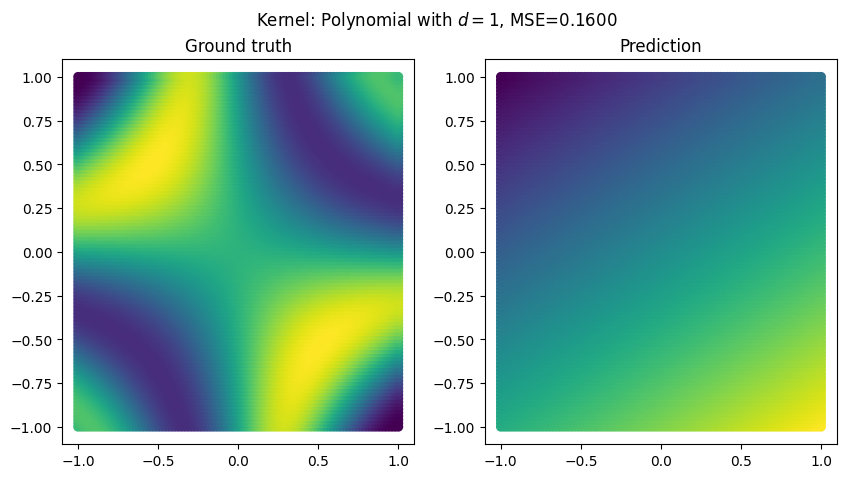

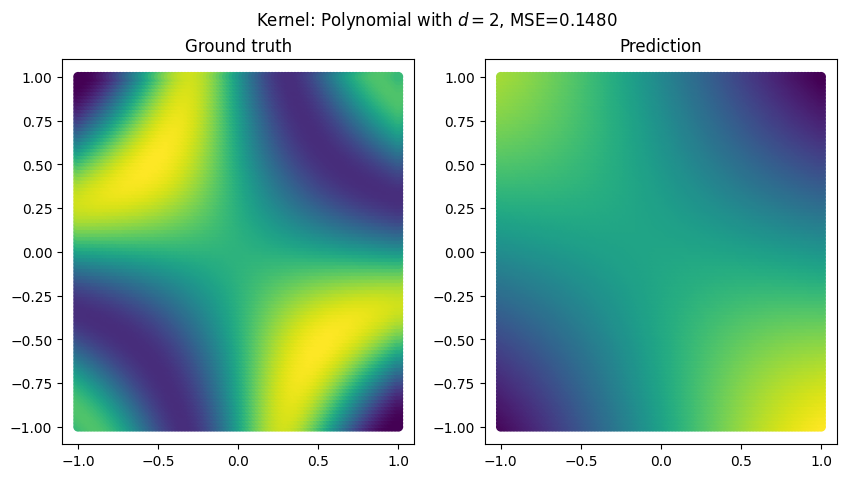

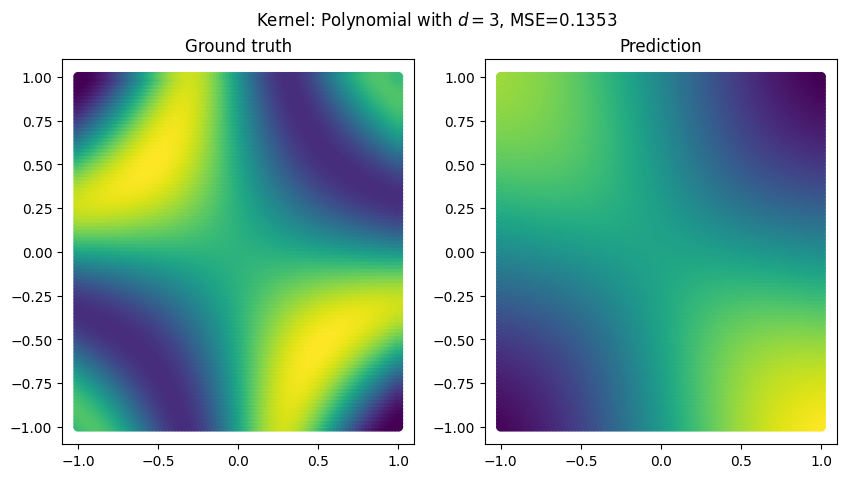

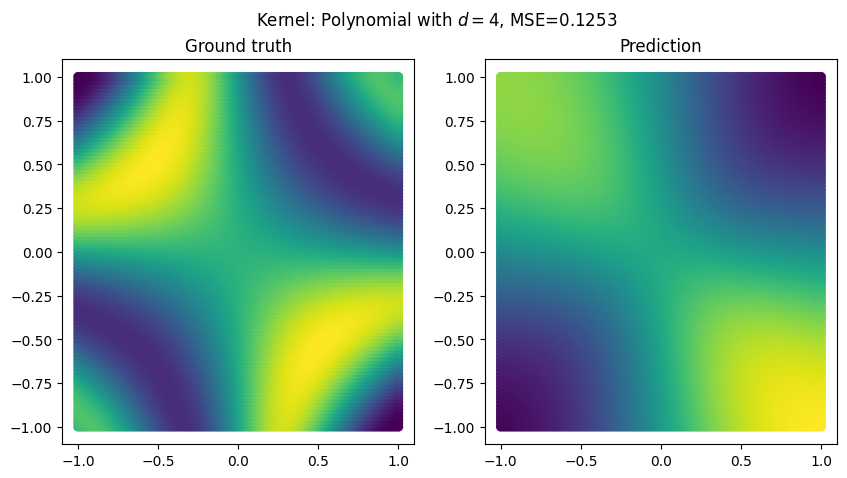

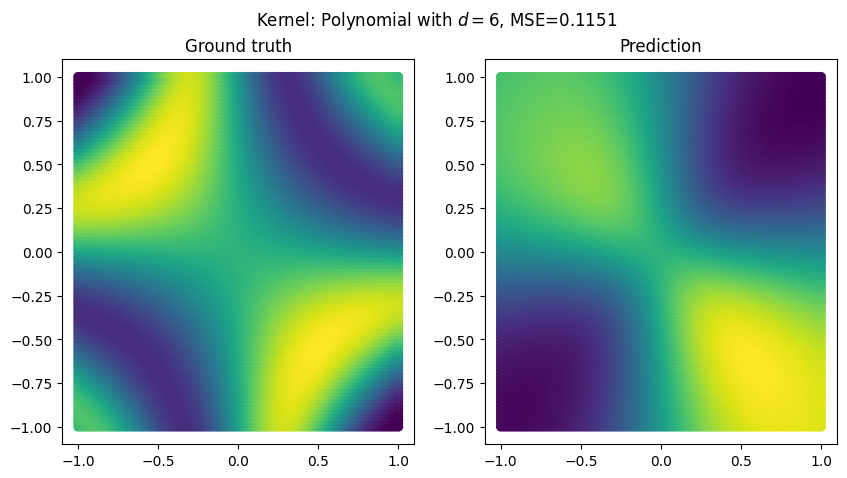

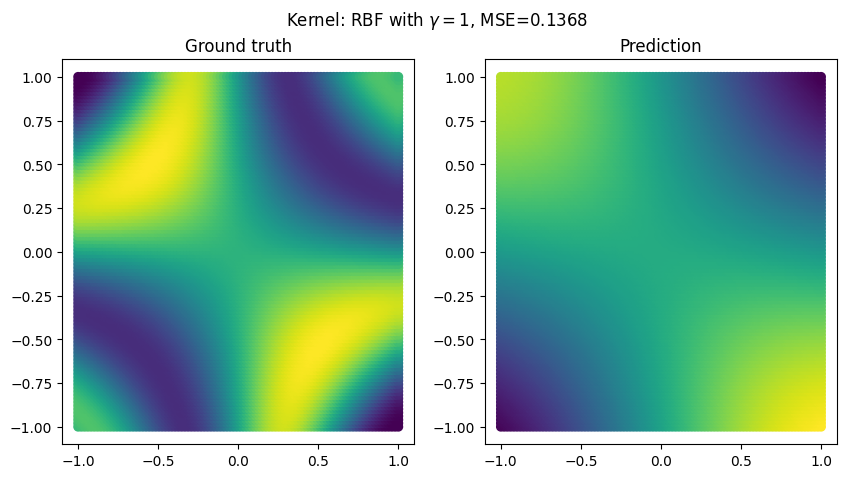

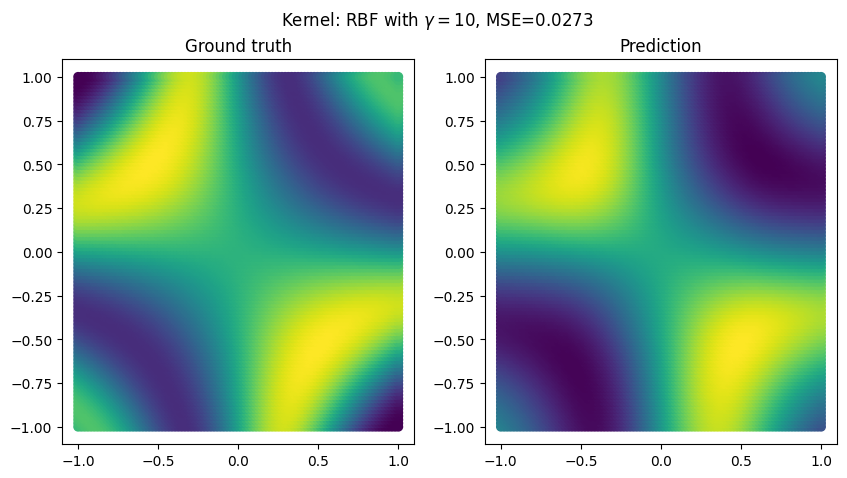

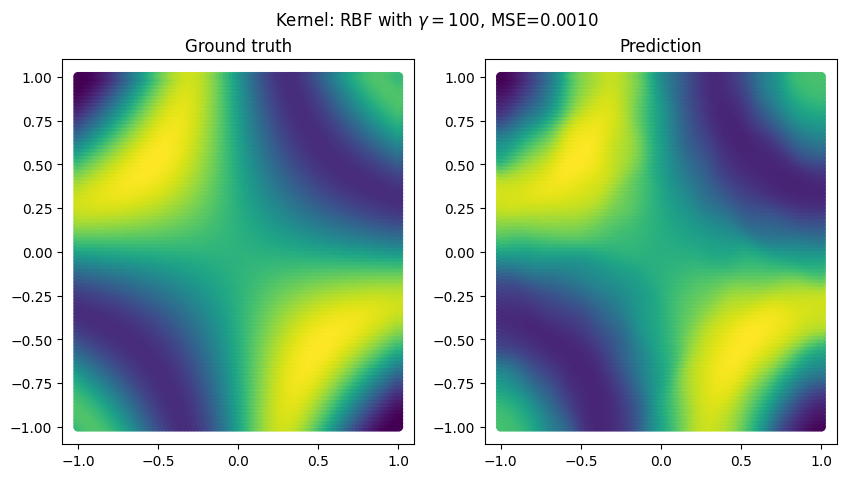

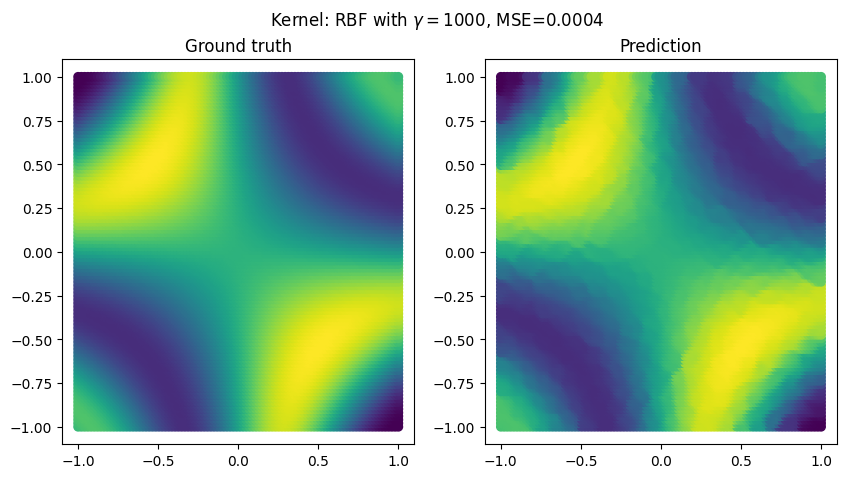

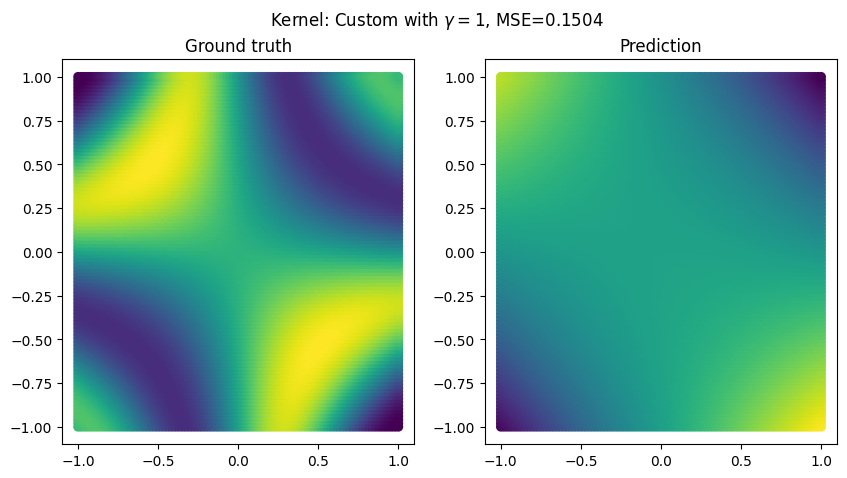

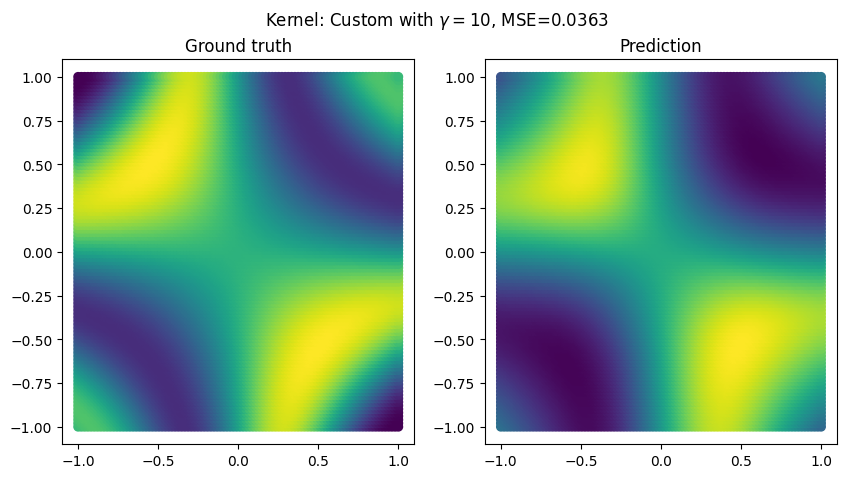

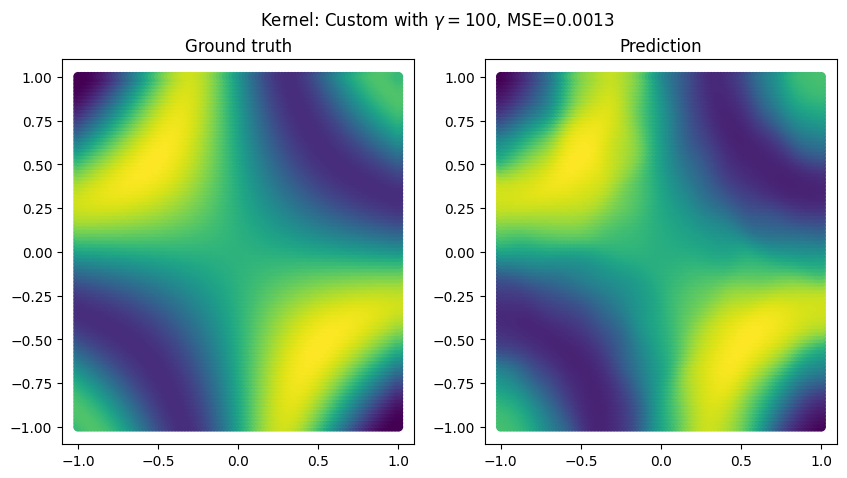

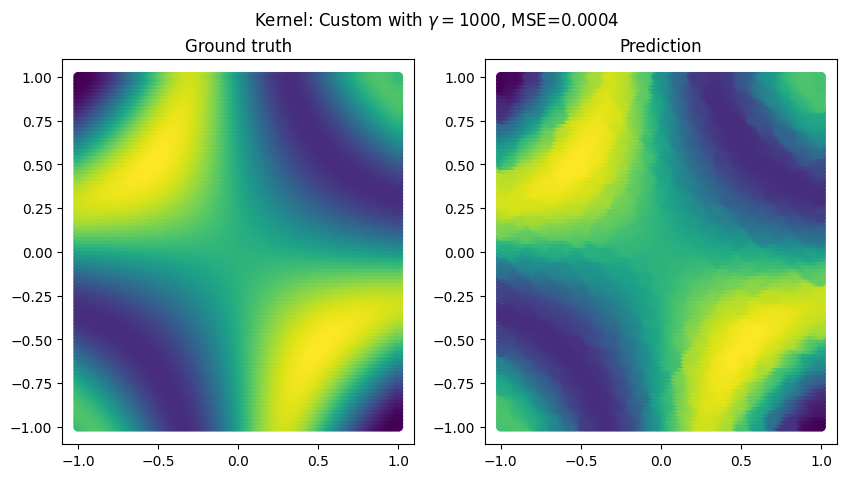

In [46]:
dims = [1,2,3,4,6]
rhos = [1,10,100,1000]

for d in dims:
    preds = predict_set(p2_x_test, p2_x_train, p2_y_train, poly_kernel, d=d)
    mse_value = mse(preds, p2_y_test)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(p2_x_test[:, 0], p2_x_test[:, 1], c=p2_y_test)
    ax[0].set_title('Ground truth')

    ax[1].scatter(p2_x_test[:, 0], p2_x_test[:, 1], c=preds)
    ax[1].set_title('Prediction')

    fig.suptitle(r'Kernel: Polynomial with $d=%d$, MSE=%.4f' % (d, mse_value))
    plt.show()

for r in rhos:
    preds = predict_set(p2_x_test, p2_x_train, p2_y_train, rbf_kernel, gamma=r)
    mse_value = mse(preds, p2_y_test)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(p2_x_test[:, 0], p2_x_test[:, 1], c=p2_y_test)
    ax[0].set_title('Ground truth')

    ax[1].scatter(p2_x_test[:, 0], p2_x_test[:, 1], c=preds)
    ax[1].set_title('Prediction')

    fig.suptitle(r'Kernel: RBF with $\gamma=%d$, MSE=%.4f' % (r, mse_value))
    plt.show()

for r in rhos:
    preds = predict_set(p2_x_test, p2_x_train, p2_y_train, custom_kernel, gamma=r)
    mse_value = mse(preds, p2_y_test)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(p2_x_test[:, 0], p2_x_test[:, 1], c=p2_y_test)
    ax[0].set_title('Ground truth')

    ax[1].scatter(p2_x_test[:, 0], p2_x_test[:, 1], c=preds)
    ax[1].set_title('Prediction')

    fig.suptitle(r'Kernel: Custom with $\gamma=%d$, MSE=%.4f' % (r, mse_value))
    plt.show()


## 2.2 Locality Sensitive Hashing (LSH)

In [47]:
def build_lsh(x_train, L=5, seed=0):
    rng = np.random.default_rng(seed)
    A = rng.normal(size=(L, x_train.shape[1]))  
    proj = x_train @ A.T                        
    codes = (proj > 0).astype(int)              
    code_ints = codes.dot(1 << np.arange(L))    

    buckets = {}
    for idx, h in enumerate(code_ints):
        buckets.setdefault(h, []).append(idx)

    return A, buckets

def query_lsh(x, A, buckets):
    code = ((x @ A.T) > 0).astype(int)
    h = code.dot(1 << np.arange(len(code)))
    return buckets.get(h, [])  

In [48]:
reg=[]
lsh=[]
for i in range(5):
    start = time.perf_counter()
    pred_full = predict_set(p2_x_test, p2_x_train, p2_y_train, rbf_kernel, gamma=10)
    end = time.perf_counter()
    print("Full time:", end - start)
    print("Full MSE:", mse(pred_full, p2_y_test))
    reg.append(end-start)

A, buckets = build_lsh(p2_x_train, L=5)
for i in range(5):
    pred_lsh = []
    start = time.perf_counter()
    for x in p2_x_test:
        idxs = query_lsh(x, A, buckets)
        pred_lsh.append(kernel_regression_predict(x, p2_x_train[idxs], p2_y_train[idxs], rbf_kernel, gamma=10))
    end = time.perf_counter()
    print("LSH time:", end - start)
    print("LSH MSE:", mse(pred_lsh, p2_y_test))
    lsh.append(end-start)

Full time: 72.88980780000566
Full MSE: 0.027340291934196057
Full time: 72.14421229995787
Full MSE: 0.027340291934196057
Full time: 71.90201510000043
Full MSE: 0.027340291934196057
Full time: 72.17862949997652
Full MSE: 0.027340291934196057
Full time: 72.11762089998228
Full MSE: 0.027340291934196057
LSH time: 9.155390300031286
LSH MSE: 0.029681402923450433
LSH time: 9.141649700002745
LSH MSE: 0.029681402923450433
LSH time: 9.16602939995937
LSH MSE: 0.029681402923450433
LSH time: 9.149740700027905
LSH MSE: 0.029681402923450433
LSH time: 9.146448600047734
LSH MSE: 0.029681402923450433


In [55]:
full_avg = sum(reg) / len(reg)
lsh_avg = sum(lsh) / len(lsh)
print("Original KNN Average Time", full_avg)
print("LSH KNN Average Time", lsh_avg)

Original KNN Average Time 72.24645711998456
LSH KNN Average Time 9.151851740013807


## 3.2 Implementation 1 

In [3]:
p3_data = pd.read_pickle("./hw3_p3.pkl")
print(p3_data.keys())
p3_x_train = p3_data["x_train"].copy()
print("Train shape:", p3_x_train.shape)

dict_keys(['x_train'])
Train shape: (100, 784)


In [4]:
X = p3_x_train
N, _ = X.shape

X_mean = np.mean(X, axis=0, keepdims=True)
X_centered = X - X_mean

G = (X_centered.T @ X_centered) / N

eigvals, eigvecs = np.linalg.eigh(G)

idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

W = eigvecs[:, :10]  

X_reduced = X_centered @ W    

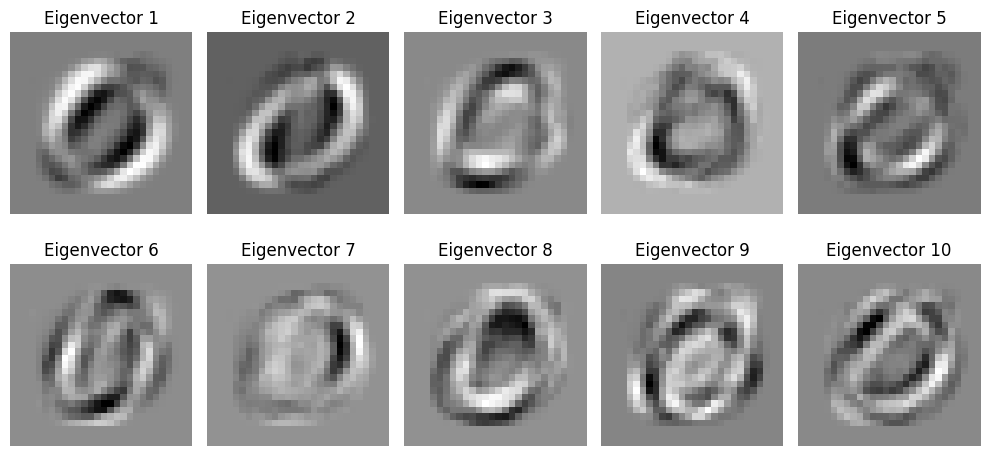

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    pc = W[:, i] 
    plt.imshow(pc.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Eigenvector {i + 1}")
plt.tight_layout()
plt.show()

## 3.3 Implementation 2

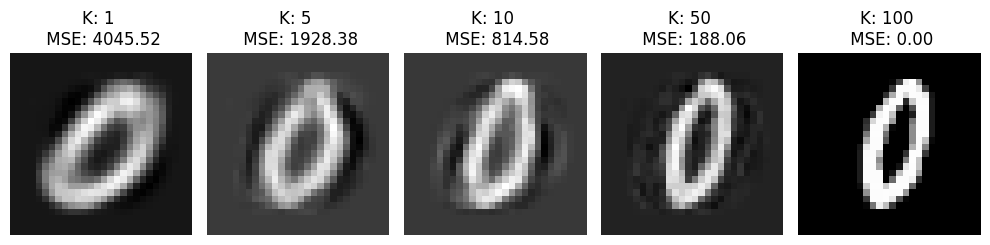

In [9]:
eigens = [1, 5, 10, 50, 100]
original = p3_x_train[23]

plt.figure(figsize=(10, 5))

for idx, k in enumerate(eigens):
    W = eigvecs[:, :k]  
    X_reduced = X_centered @ W    
    reduced_vec = X_reduced[23]            
    recon = (reduced_vec @ W.T) + X_mean   

    plt.subplot(2, 5, idx + 1)
    plt.imshow(recon.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"K: {k} \n MSE: {mse(original, recon):.2f}")

plt.tight_layout()
plt.show()

